# Clinical-Decision-Support -System

In [4]:
pip install --upgrade tensorflow



INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 578.7 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 578.7 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 578.7 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 578.7 kB/s 

In [2]:
pip install protobuf==3.20.0


   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
   ---

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


# 1.Import needed libraries


In [48]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import StratifiedKFold

#Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
#Scaling
from sklearn.preprocessing import MinMaxScaler
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy import stats


# Weka library
#from weka.classifiers import Classifier, Evaluation
#from weka.core import DenseInstance
#from weka.core.converters import Loader
#from weka.classifiers import GridSearch

In [49]:
#Data loading
data = pd.read_csv("C:/Users/RTX/Downloads/Clinical-Decision-Support-System/data.csv")
data.head(6) 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1,0,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1,1,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
5,0,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [50]:
#They are 1643 rows, 133 columns
data.shape

(1643, 133)

In [51]:
#Display summary statistics for the DataFrame
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,1643.00000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1642.000000,1642.000000,...,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000
mean,0.13025,0.149726,0.021302,0.041388,0.019477,0.153378,0.131467,0.041388,0.041413,0.019488,...,0.019488,0.019488,0.019488,0.021924,0.021924,0.021924,0.021924,0.021924,0.021924,0.021924
std,0.33668,0.356911,0.144435,0.199246,0.138235,0.360461,0.338013,0.199246,0.199304,0.138276,...,0.138276,0.138276,0.138276,0.146482,0.146482,0.146482,0.146482,0.146482,0.146482,0.146482
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
itching,1643.0,0.130250,0.336680,0.0,0.0,0.0,0.0,1.0
skin_rash,1643.0,0.149726,0.356911,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,1643.0,0.021302,0.144435,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,1643.0,0.041388,0.199246,0.0,0.0,0.0,0.0,1.0
shivering,1643.0,0.019477,0.138235,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,1642.0,0.021924,0.146482,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,1642.0,0.021924,0.146482,0.0,0.0,0.0,0.0,1.0
blister,1642.0,0.021924,0.146482,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,1642.0,0.021924,0.146482,0.0,0.0,0.0,0.0,1.0


In [54]:
# Display summary statistics for the DataFrame
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

          itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  1643.00000  1643.000000           1643.000000          1643.000000   
mean      0.13025     0.149726              0.021302             0.041388   
std       0.33668     0.356911              0.144435             0.199246   
min       0.00000     0.000000              0.000000             0.000000   
25%       0.00000     0.000000              0.000000             0.000000   
50%       0.00000     0.000000              0.000000             0.000000   
75%       0.00000     0.000000              0.000000             0.000000   
max       1.00000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  1643.000000  1643.000000  1643.000000   1643.000000  1642.000000   
mean      0.019477     0.153378     0.131467      0.041388     0.041413   
std       0.138235     0.360461     0.338013      0.199246     0.199304   
min   

In [55]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [56]:
data.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
inflammatory_nails      float64
blister                 float64
red_sore_around_nose    float64
yellow_crust_ooze       float64
prognosis                object
Length: 133, dtype: object

In [57]:
data.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
1638        0          1                     0                    0   
1639        0          1                     0                    0   
1640        1          1                     1                    0   
1641        0          1                     1                    0   
1642        1          0                     1                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0

In [58]:
#seeing any null values are there with descending format
data.isnull().sum().sort_values(ascending=False)

bruising              1
spinning_movements    1
altered_sensorium     1
muscle_pain           1
irritability          1
                     ..
skin_rash             0
chills                0
joint_pain            0
stomach_pain          0
itching               0
Length: 133, dtype: int64

In [59]:
#looking how much percent each diseases having
data['prognosis'].value_counts(normalize = True)

prognosis
Fungal infection                           0.025579
Hepatitis C                                0.024361
Hepatitis E                                0.024361
Alcoholic hepatitis                        0.024361
Tuberculosis                               0.024361
Common Cold                                0.024361
Pneumonia                                  0.024361
Dimorphic hemmorhoids(piles)               0.024361
Heart attack                               0.024361
Varicose veins                             0.024361
Hypothyroidism                             0.024361
Hyperthyroidism                            0.024361
Hypoglycemia                               0.024361
Osteoarthristis                            0.024361
Arthritis                                  0.024361
(vertigo) Paroymsal  Positional Vertigo    0.024361
Acne                                       0.024361
Urinary tract infection                    0.024361
Psoriasis                                  0.024361
He

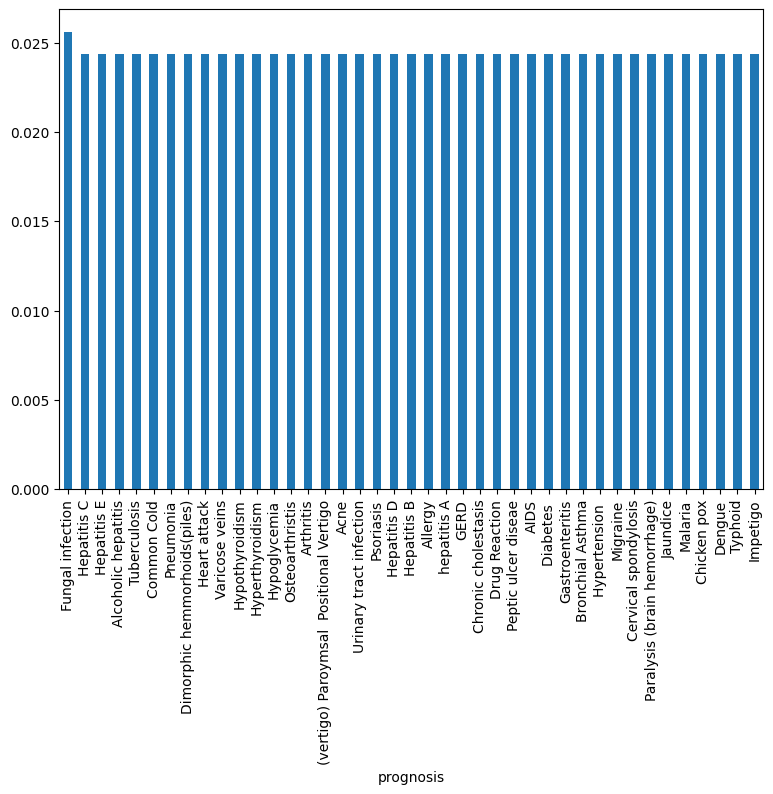

In [60]:
#as we can see each no. diseases having the same percentage through bar chart
data['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [61]:
#checking if there are any other data types
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [62]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(data['cold_hands_and_feets'],data['weight_gain'])

weight_gain,0.0,1.0
cold_hands_and_feets,,
0.0,1602,4
1.0,4,32


In [63]:
#imported the chi square contingency
from scipy.stats import chi2_contingency

In [64]:
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(data['cold_hands_and_feets'],data['weight_gain']))

Chi2ContingencyResult(statistic=1249.1176160789475, pvalue=1.2907658045278253e-273, dof=1, expected_freq=array([[1.57078928e+03, 3.52107186e+01],
       [3.52107186e+01, 7.89281364e-01]]))

# 2.Data Cleaning

In [65]:
data.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
inflammatory_nails      float64
blister                 float64
red_sore_around_nose    float64
yellow_crust_ooze       float64
prognosis                object
Length: 133, dtype: object

In [66]:
#checking if there are any other data types
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

# Check for duplicate rows

In [20]:
duplicated=data.duplicated().sum()
if duplicated:
    print("Duplicated rows in the dataset is:{}".format(duplicated))
else:
    print("No Duplicated rows")

Duplicated rows in the dataset is:1338


In [21]:
duplicated=data[data.duplicated(keep=False)]
duplicated.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
1,0,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
2,1,0,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
3,1,1,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection
4,1,1,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection


In [22]:
data_no_duplicates = data.drop_duplicates(keep='first')

In [67]:
data.shape

(1643, 133)

# Statistics summary

In [68]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,1643.00000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1642.000000,1642.000000,...,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000
mean,0.13025,0.149726,0.021302,0.041388,0.019477,0.153378,0.131467,0.041388,0.041413,0.019488,...,0.019488,0.019488,0.019488,0.021924,0.021924,0.021924,0.021924,0.021924,0.021924,0.021924
std,0.33668,0.356911,0.144435,0.199246,0.138235,0.360461,0.338013,0.199246,0.199304,0.138276,...,0.138276,0.138276,0.138276,0.146482,0.146482,0.146482,0.146482,0.146482,0.146482,0.146482
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

# Detection  skewness

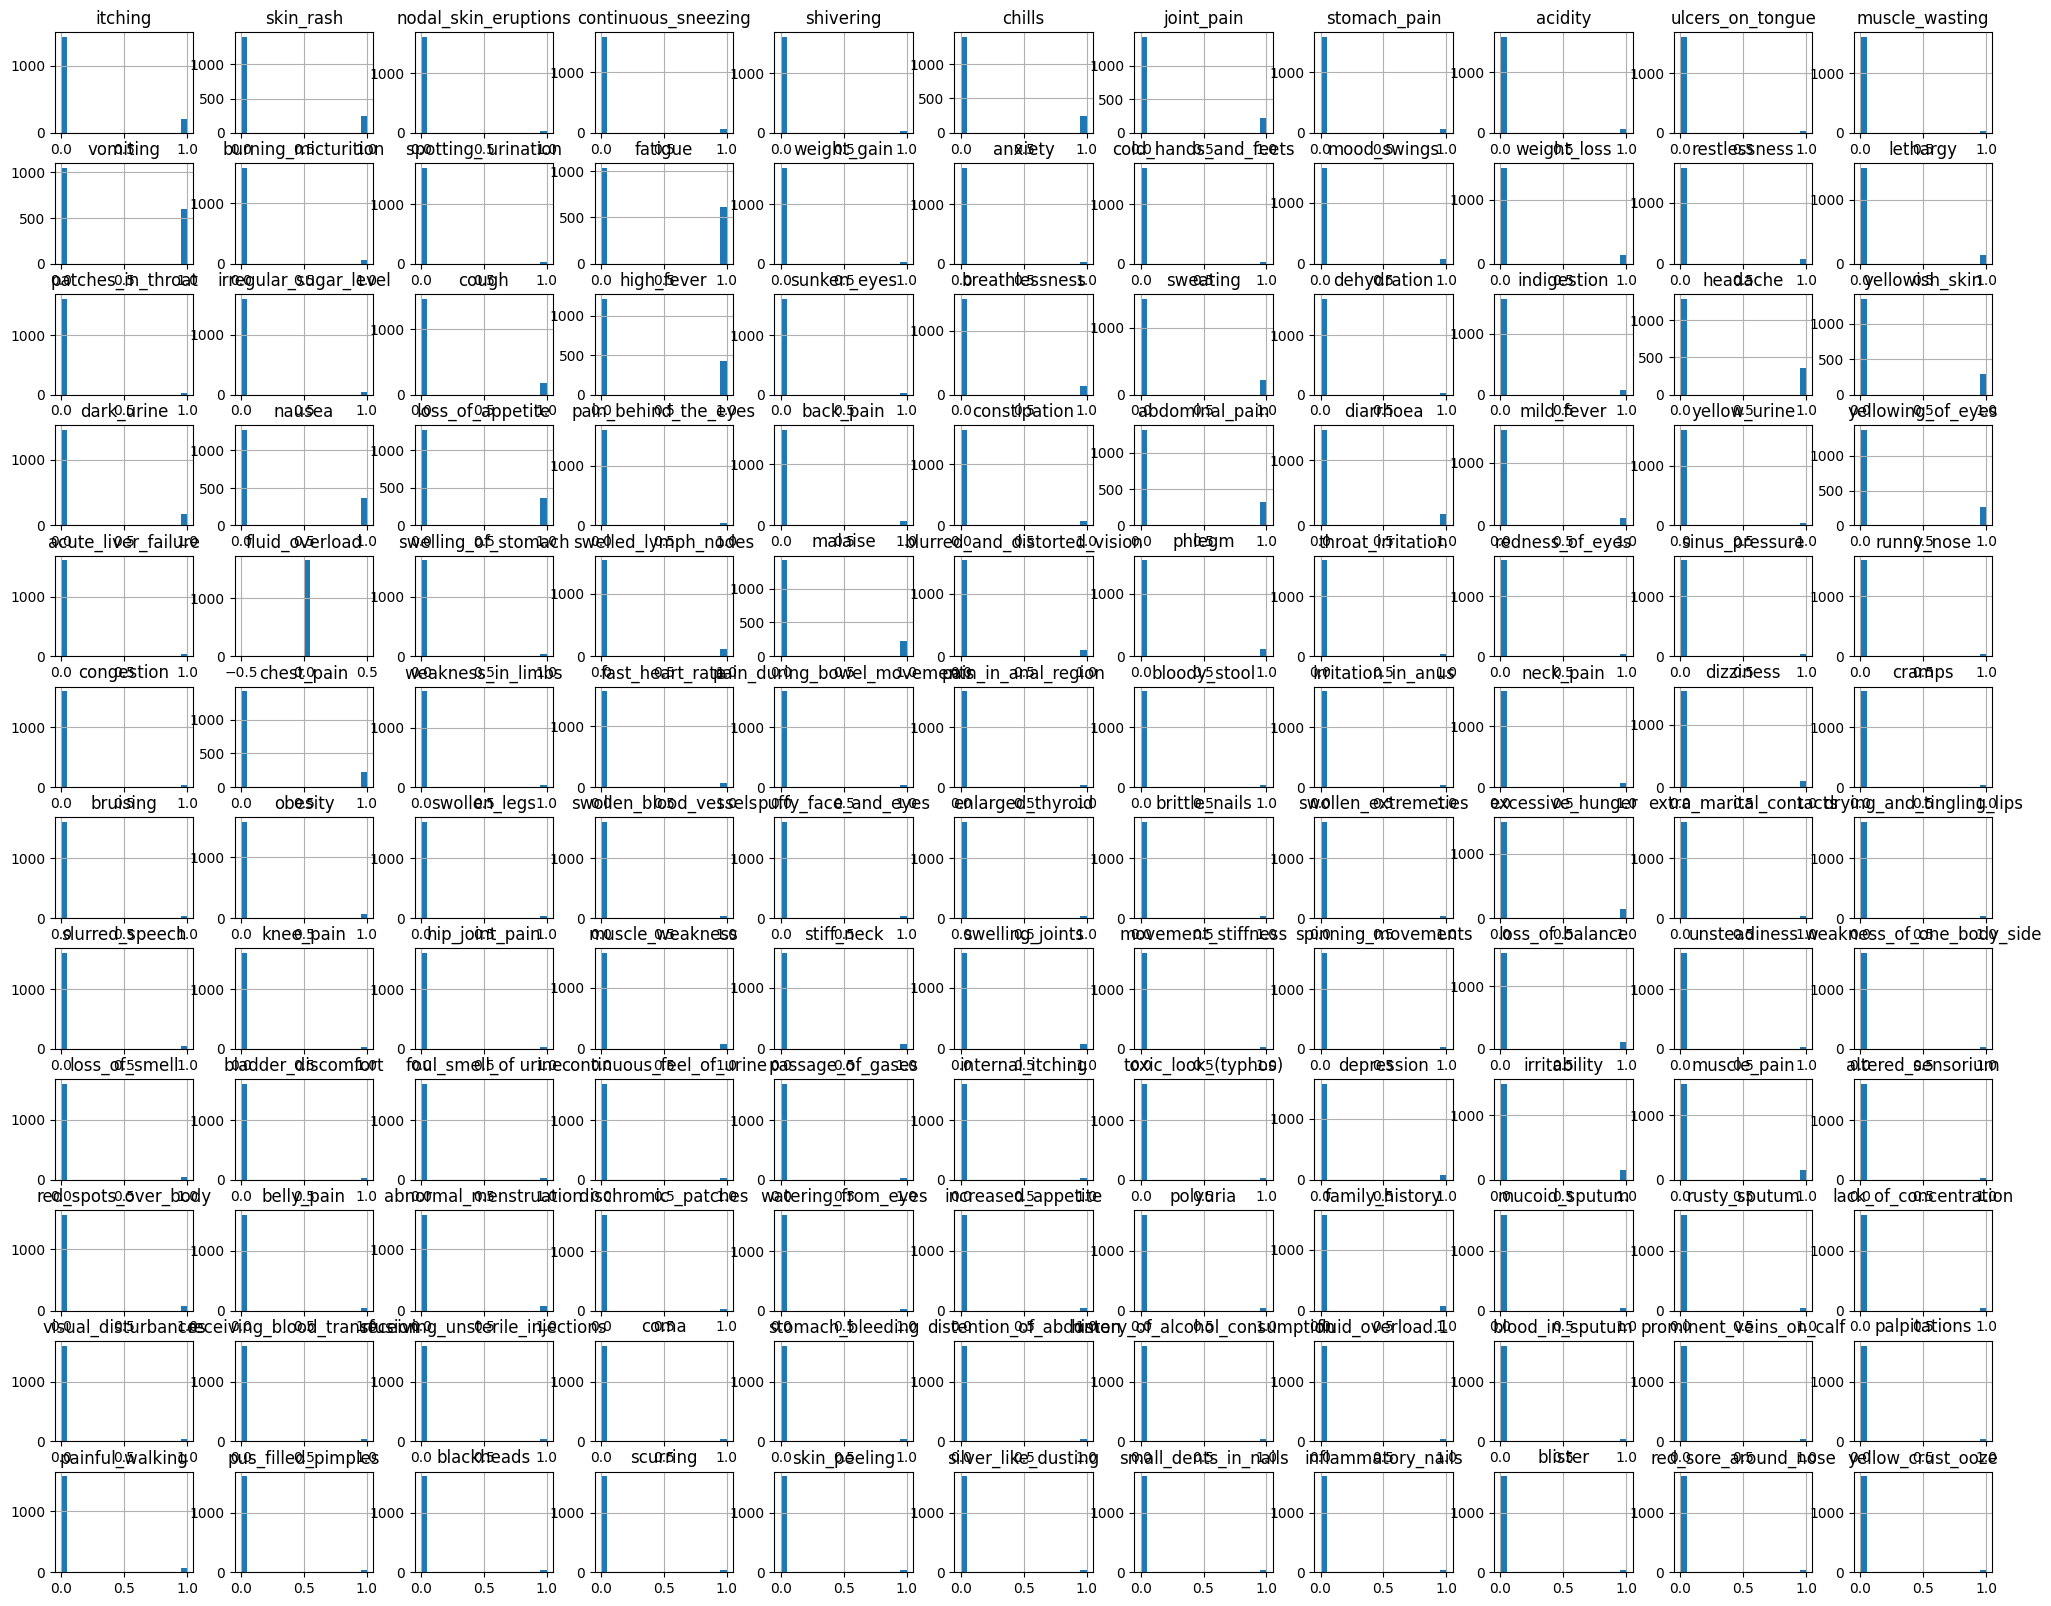

In [70]:
#Histogram:
data.hist(figsize=(25, 20), bins=20)
plt.show()

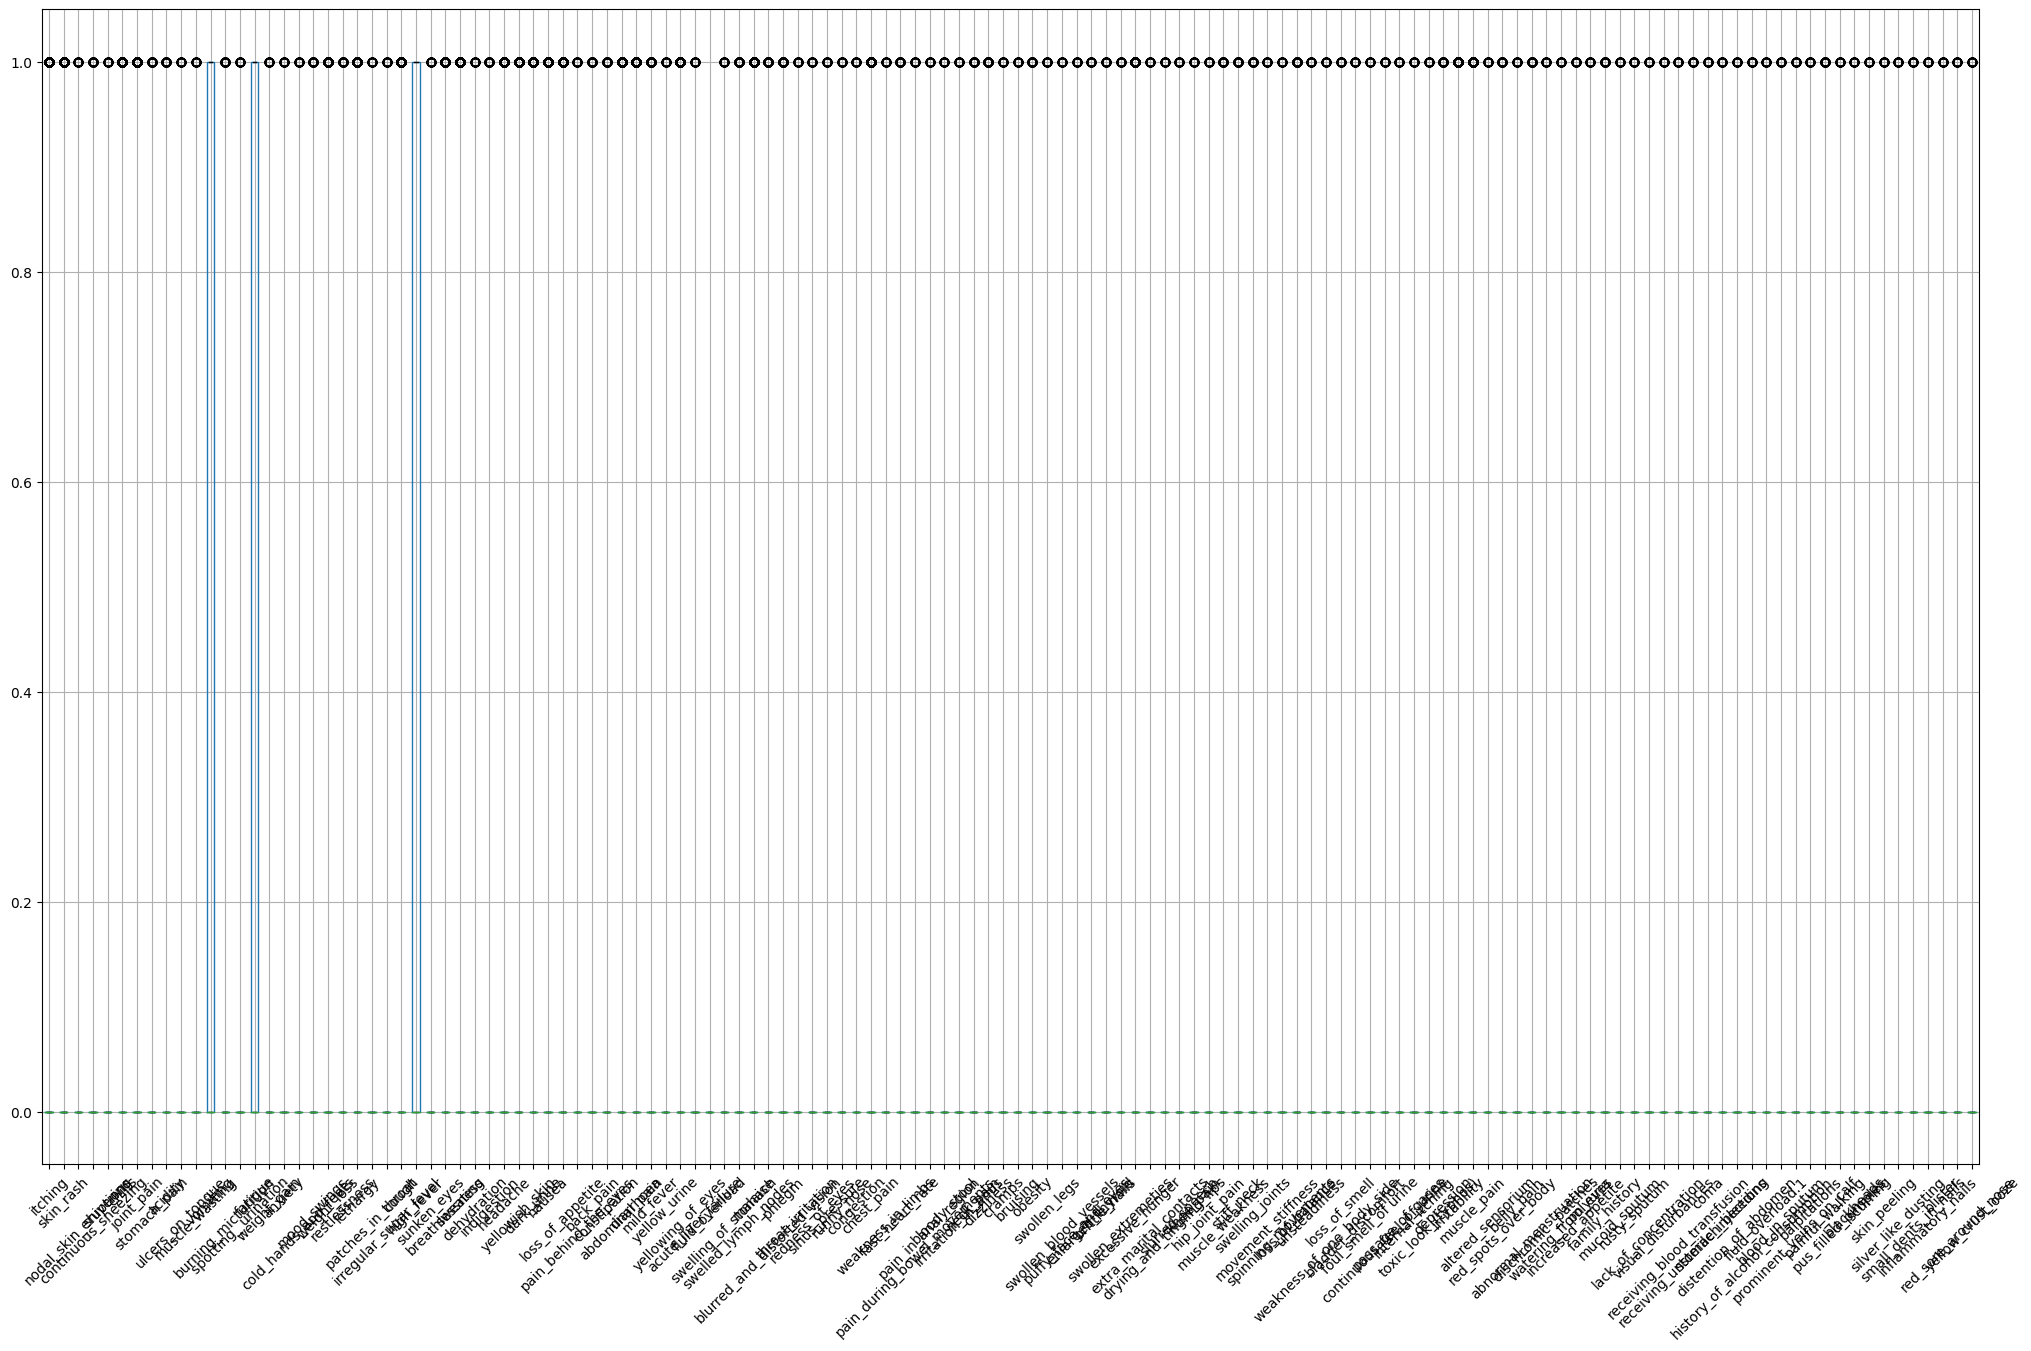

In [71]:
#boxplot
data.boxplot(figsize=(25, 15), rot=45)
plt.show()

# Modeling

In [95]:
from sklearn.model_selection import train_test_split

# Assuming X is the feature matrix (independent variables) and y is the target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Handling Missing values

In [96]:
from sklearn.impute import SimpleImputer

# Create the imputer object to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or 'most_frequent' as needed

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test_imputed = imputer.transform(X_test)  # Only transform the test data


In [98]:
import pandas as pd

# Combine X_train and y_train into a DataFrame for easier handling
data_clean = pd.concat([X_train, y_train], axis=1)  # Concatenate the features and target
data_clean = data_clean.dropna()  # Remove rows where any NaN exists

# Separate the cleaned data back into features (X) and target (y)
X_train_clean = data_clean.drop(columns=['prognosis'])  # Drop the target column to get cleaned features
y_train_clean = data_clean['prognosis']  # Extract the target column


# Modeling

In [102]:

# Separate the features and target again
X_train_clean = data_clean.drop(columns=['prognosis'])  # Drop the target column to get cleaned features
y_train_clean = data_clean['prognosis']  # Extract the target column

# Step 3: Split the data into training and testing sets again (since we cleaned the data)
X_train, X_test, y_train, y_test = train_test_split(X_train_clean, y_train_clean, test_size=0.3, random_state=42)

In [103]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
prognosis
Fungal infection                           28
Chronic cholestasis                        26
Hyperthyroidism                            25
hepatitis A                                24
Paralysis (brain hemorrhage)               23
Hypothyroidism                             23
Psoriasis                                  23
Dimorphic hemmorhoids(piles)               23
Hepatitis E                                23
Hepatitis C                                23
Bronchial Asthma                           22
Acne                                       22
Pneumonia                                  22
Tuberculosis                               22
Chicken pox                                22
Jaundice                                   22
Hypertension                               22
GERD                                       20
Common Cold                                20
Heart attack                               20
(vertigo) Paroymsal  P

In [104]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(804, 132)
(804,)
------------Test Set------------------
(345, 132)
(345,)


# Machine Learning Classifiers 

# 1. DecisionTree Classifier

In [99]:


# Create a DecisionTreeClassifier model
decc = DecisionTreeClassifier()  # You can customize parameters of the model if needed

# Fit the model to the cleaned training data
decc.fit(X_train_clean, y_train_clean)


DecisionTreeClassifier()

In [100]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions using the imputed test data
y_pred_decc = decc.predict(X_test_imputed)

# Evaluate the accuracy of the DecisionTreeClassifier model
accuracy_decc = accuracy_score(y_test, y_pred_decc)  # Compare predictions to the true labels in y_test
print("Accuracy of DecisionTree on the test set:", accuracy_decc)

# Show the classification report for more detailed performance metrics
classification_report_result = classification_report(y_test, y_pred_decc)
print("Classification Report:\n", classification_report_result)


Accuracy of DecisionTree on the test set: 0.9837728194726166
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00        14
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        11
                                Allergy       1.00      1.00      1.00        17
                              Arthritis       1.00      1.00      1.00        16
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       0.76      1.00      0.87        13
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00         4
                       

In [105]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=decc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_decc = grid_search.best_estimator_
y_pred_decc = best_decc.predict(X_test)

# Evaluate the accuracy of the best DecisionTreeClassifier model
accuracy_decc = accuracy_score(y_test, y_pred_decc)
print("Accuracy of DecisionTree on the test set:", accuracy_decc)

#Show the classification report
classification_report_result = classification_report(y_test, y_pred_decc)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy of DecisionTree on the test set: 0.9623188405797102
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.90      0.95        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       0.77      1.00      0.87        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      0.88      0.93         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00   

# 2.K-Nearest Neighbour (KNN)

In [106]:
# Create a k-NN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) 

# Fit the k-NN model to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:


# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the accuracy of the k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN on the test set:", accuracy_knn)

#Show the classification report
classification_report_result = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_report_result)

Accuracy of k-NN on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Common Cold       

In [108]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust values based on your preference
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_knn_classifier = grid_search.best_estimator_
y_pred_knn = best_knn_classifier.predict(X_test)

# Evaluate the accuracy of the best k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN on the test set:", accuracy_knn)

#Show the classification report
classification_report_result = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy of k-NN on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      

# 3.Logistic Regression Classifier

In [109]:
# Create a Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the Logistic Regression model to the training data
logreg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [110]:


# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression on the test set:", accuracy_logreg)

#Show the classification report
classification_report_result = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", classification_report_result)

Accuracy of Logistic Regression on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Com

In [111]:
# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_logreg_classifier = grid_search.best_estimator_
y_pred_logreg = best_logreg_classifier.predict(X_test)

# Evaluate the accuracy of the best Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression on the test set:", accuracy_logreg)

#Show the classification report
classification_report_result = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy of Logistic Regression on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00  

# 4.Random Forest Classifier

In [112]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  

# Fit the Random Forest model to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:


# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest on the test set:", accuracy_rf)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_rf)
print("Classification Report:\n", classification_report_result)

Accuracy of Random Forest on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Common Co

# 5.Gaussian Naive Bayes Classifier

In [116]:
# Create a Gaussian Naive Bayes Classifier
gnb_classifier = GaussianNB()

# Fit the Gaussian Naive Bayes model to the training data
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_classifier.predict(X_test)

# Evaluate the accuracy of the Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Gaussian Naive Bayes on the test set:", accuracy_gnb)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_gnb)
print("Classification Report:\n", classification_report_result)

Accuracy of Gaussian Naive Bayes on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Co

In [117]:
# Define the hyperparameters and their possible values
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=gnb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_gnb_classifier = grid_search.best_estimator_
y_pred_gnb = best_gnb_classifier.predict(X_test)

# Evaluate the accuracy of the best Gaussian Naive Bayes model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of Gaussian Naive Bayes on the test set:", accuracy_gnb)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_gnb)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'var_smoothing': 1e-09}
Accuracy of Gaussian Naive Bayes on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00    

# 6.Multinomial Naive Bayes Classifier

In [119]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB


In [120]:
# Create a Multinomial Naive Bayes Classifier
mnb_classifier =  MultinomialNB()

# Fit the Multinomial Naive Bayes model to the training data
mnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mnb = mnb_classifier.predict(X_test)

# Evaluate the accuracy of the Multinomial Naive Bayes model
accuracy_mnb  = accuracy_score(y_test, y_pred_mnb )
print("Accuracy of Multinomial Naive Bayes on the test set:", accuracy_mnb)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_mnb)
print("Classification Report:\n", classification_report_result)

Accuracy of Multinomial Naive Bayes on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                           

# 7.Support Vector Machine Classifier

In [125]:
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVC
svc_classifier = SVC(kernel='rbf', gamma='auto', random_state=42)

# Fit the SVC model to the training data
svc_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the SVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of SVC on the test set:", accuracy_svc)

# Show the classification report
classification_report_result_svc = classification_report(y_test, y_pred_svc)
print("Classification Report (SVC):\n", classification_report_result_svc)

Accuracy of SVC on the test set: 1.0
Classification Report (SVC):
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Common Cold  

In [126]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Kernel type
}

# Create an SVC
svc_classifier = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='accuracy')

# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create the final SVC model
final_svc_classifier = SVC(**best_params, random_state=42)

# Fit the final SVC model to the training data
final_svc_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_final_svc = final_svc_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the final SVC model
accuracy_final_svc = accuracy_score(y_test, y_pred_final_svc)
print("Accuracy of Tuned SVC on the test set:", accuracy_final_svc)

# Show the best parameters
print("Best Parameters:", best_params)

# Show the classification report
classification_report_result_final_svc = classification_report(y_test, y_pred_final_svc)
print("Classification Report (Tuned SVC):\n", classification_report_result_final_svc)

Accuracy of Tuned SVC on the test set: 1.0
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report (Tuned SVC):
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.

# 8.AdaBoost Classifier

In [128]:
# Create a base Decision Tree Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create an AdaBoost Classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy of AdaBoost on the test set:", accuracy_adaboost)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_adaboost)
print("Classification Report:\n", classification_report_result)

Accuracy of AdaBoost on the test set: 0.9623188405797102
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.90      0.95        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      0.88      0.93         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       0.71      1.00      0.83        10
                           

In [129]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_adaboost_classifier = grid_search.best_estimator_
y_pred_adaboost = best_adaboost_classifier.predict(X_test)

# Evaluate the accuracy of the best AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy of AdaBoost on the test set:", accuracy_adaboost)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_adaboost)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy of AdaBoost on the test set: 0.9623188405797102
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.90      0.95        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      0.88      0.93         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis   

# 9.Extra Trees Classifier

In [130]:
# Create an Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)  
# Fit the Extra Trees model to the training data
extra_trees_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Evaluate the accuracy of the Extra Trees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("Accuracy of Extra Trees on the test set:", accuracy_extra_trees)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_extra_trees)
print("Classification Report:\n", classification_report_result)

Accuracy of Extra Trees on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Common Cold

In [131]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=extra_trees_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_extra_trees_classifier = grid_search.best_estimator_
y_pred_extra_trees = best_extra_trees_classifier.predict(X_test)

# Evaluate the accuracy of the best Extra Trees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("Accuracy of Extra Trees on the test set:", accuracy_extra_trees)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_extra_trees)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of Extra Trees on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.

# 10. Stochastic Gradient Descent (SGD) Classifier

In [132]:
# Create an SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)

# Fit the SGD model to the scaled training data
sgd_classifier.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_sgd = sgd_classifier.predict(X_test)

# Evaluate the accuracy of the SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Accuracy of SGD Classifier on the scaled test set:", accuracy_sgd)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_sgd)
print("Classification Report:\n", classification_report_result)

Accuracy of SGD Classifier on the scaled test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            C

In [133]:
# Define the hyperparameters and their possible values
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_sgd_classifier = grid_search.best_estimator_
y_pred_sgd = best_sgd_classifier.predict(X_test)

# Evaluate the accuracy of the best SGD model
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Accuracy of SGD Classifier on the test set:", accuracy_sgd)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_sgd)
print("Classification Report:\n", classification_report_result)

Best Hyperparameters: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Accuracy of SGD Classifier on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
               

# 11.Gradient Boosting Classifier

In [134]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (n_estimators) as needed

# Fit the Gradient Boosting model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the accuracy of the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting on the test set:", accuracy_gb)

#Show the classification report
classification_report_result = classification_report(y_test,y_pred_gb)
print("Classification Report:\n", classification_report_result)

Accuracy of Gradient Boosting on the test set: 0.9855072463768116
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.90      0.95        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       0.77      1.00      0.87        10
                  

# 12.Multi-Layer Perceptron (MLP) classifier

In [136]:
# Create an MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the MLP model to the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the accuracy of the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP on the test set:", accuracy_mlp)

# Show the classification report
classification_report_result_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report (MLP):\n", classification_report_result_mlp)

Accuracy of MLP on the test set: 1.0
Classification Report (MLP):
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Common Cold  

# 14.Voting Classifier "Hard voting"

In [138]:
# Create individual classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
logreg_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gnb_classifier = GaussianNB()
svm_classifier = SVC(kernel='linear', random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
sgd_classifier = SGDClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('Decision Tree', dt_classifier),
        ('KNN', knn_classifier),
        ('Logistic Regression', logreg_classifier),
        ('Random Forest', rf_classifier),
        ('Gaussian NB', gnb_classifier),
        ('SVM', svm_classifier),
        ('XGBoost', xgb_classifier),
        ('AdaBoost', adaboost_classifier),
        ('Extra Trees', extra_trees_classifier),
        ('SGD', sgd_classifier),
        ('Gradient Boosting', gb_classifier)
    ],
    voting='hard'  # You can choose 'hard' or 'soft' voting
)

In [139]:
# Fit the ensemble model to the training data
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Gaussian NB', GaussianNB()),
                             ('SVM', SVC(kernel='linear', random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, boo...
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('AdaBoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                 random_state=42)),
                             ('Extra Trees',
                              ExtraTreesClassifier(random_state=42)),
                             ('SGD', SGDClassifier(random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42))])

In [140]:
# Make predictions on the test set
y_pred_ensemble = ensemble_classifier.predict(X_test)

In [141]:
# Evaluate the accuracy of the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
#Calculate the classification report
classification_report_result = classification_report(y_test, y_pred_ensemble)

print("Accuracy of the Ensemble model on the test set:", accuracy_ensemble)
#Show the classification report
print("Classification Report:\n", classification_report_result)

Accuracy of the Ensemble model on the test set: 1.0
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        10
                                   AIDS       1.00      1.00      1.00         8
                                   Acne       1.00      1.00      1.00         9
                    Alcoholic hepatitis       1.00      1.00      1.00        17
                                Allergy       1.00      1.00      1.00        12
                              Arthritis       1.00      1.00      1.00         8
                       Bronchial Asthma       1.00      1.00      1.00         9
                   Cervical spondylosis       1.00      1.00      1.00         7
                            Chicken pox       1.00      1.00      1.00         7
                    Chronic cholestasis       1.00      1.00      1.00        10
                            Comm

In [142]:
# Optionally, you can perform cross-validation to get a more robust estimate of performance
cv_scores_ensemble = cross_val_score(ensemble_classifier, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores of the Ensemble model:", cv_scores_ensemble)
print("Mean cross-validation score of the Ensemble model:", cv_scores_ensemble.mean())

Cross-validation scores of the Ensemble model: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation score of the Ensemble model: 1.0
